In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns', None )

In [141]:
df = pd.read_csv('./machine learning/price.csv')

df_test = pd.read_csv('./house_price/test.csv')



(1460, 81)

In [14]:
num_va_na = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_va_na_test = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']



def fillnum_na(dft, num_va):
    
    dfz = dft.copy()
    
    for feature in num_va:
        
        dfz[feature].fillna(dfz[feature].median(), inplace=True)
    return dfz


data = fillnum_na(df, num_va_na)

data_test = fillnum_na(df_test, num_va_na_test)

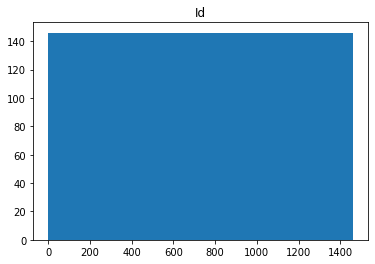

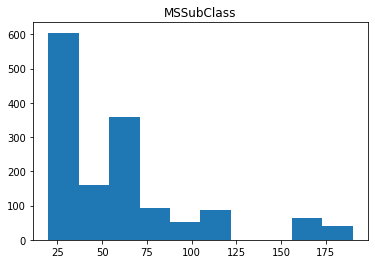

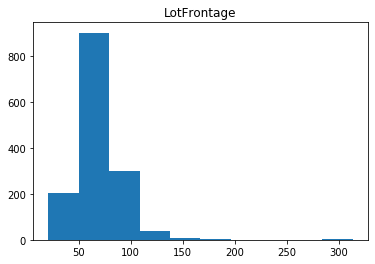

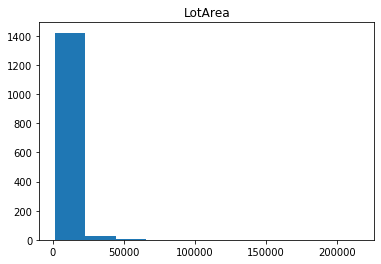

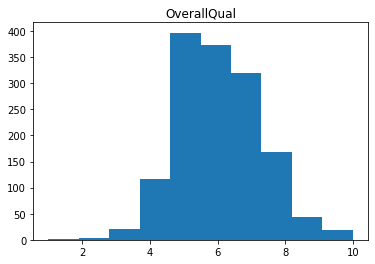

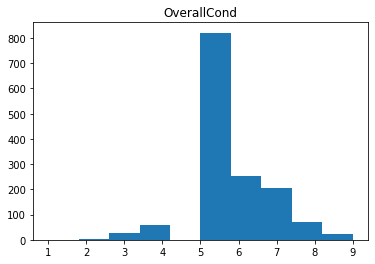

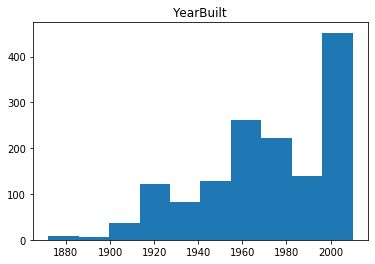

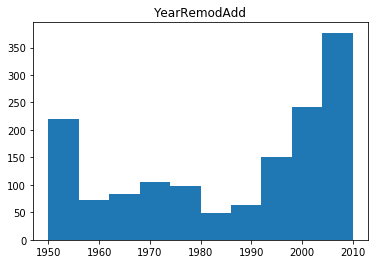

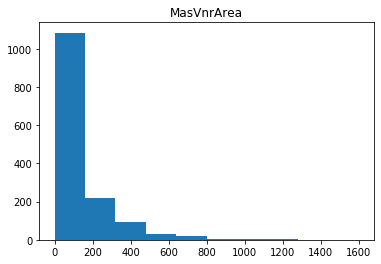

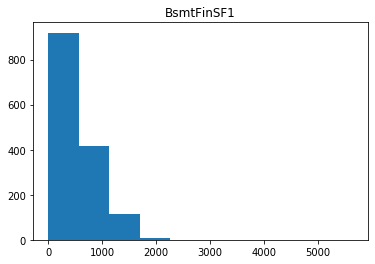

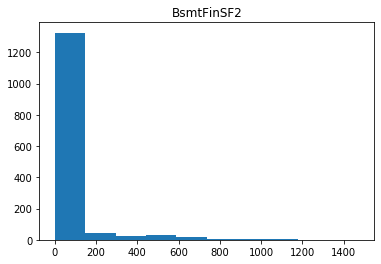

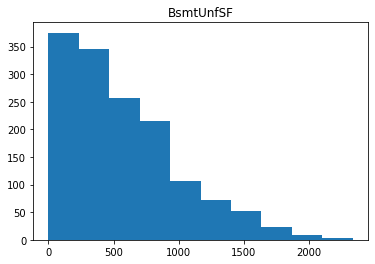

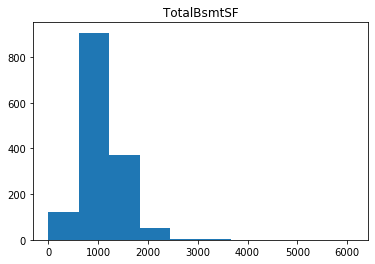

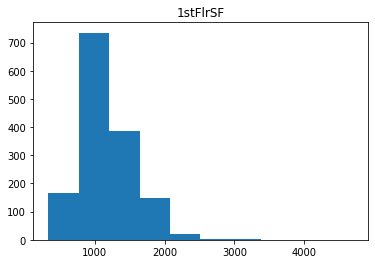

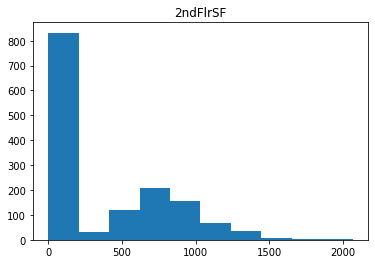

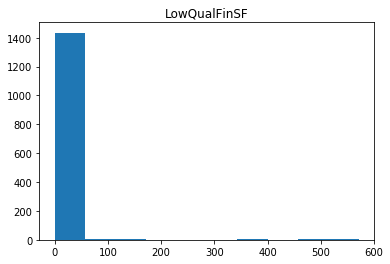

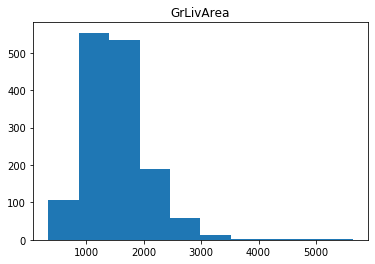

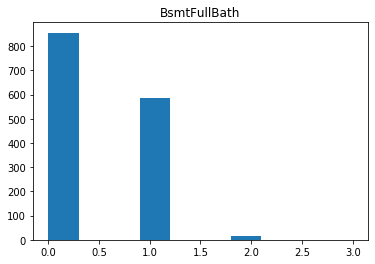

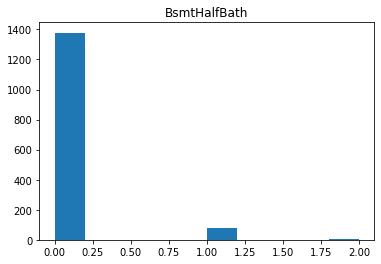

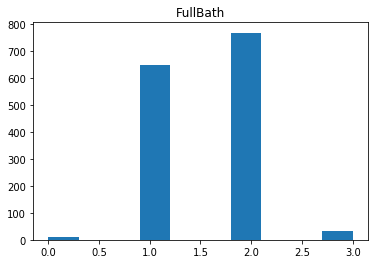

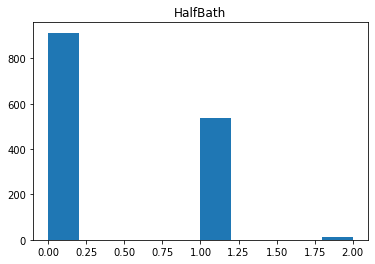

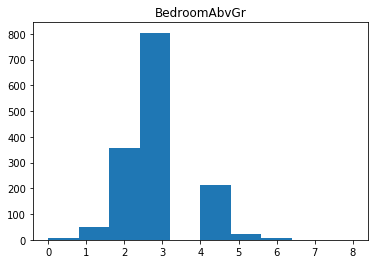

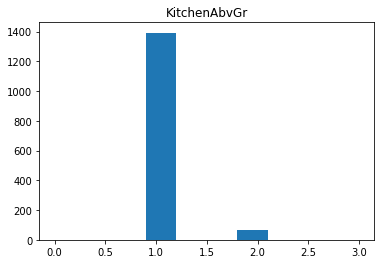

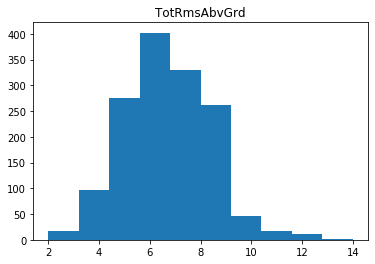

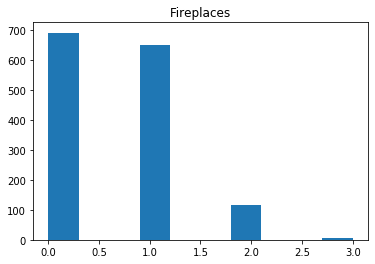

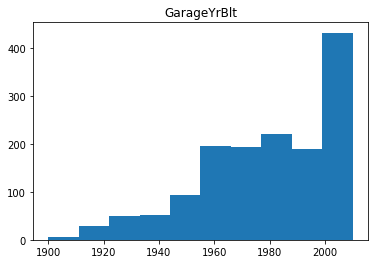

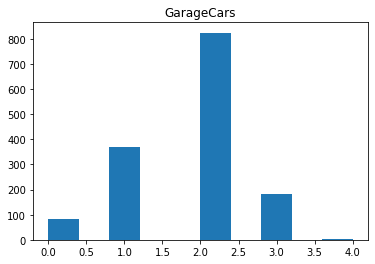

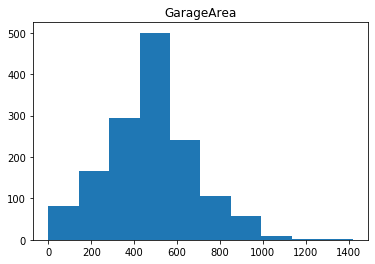

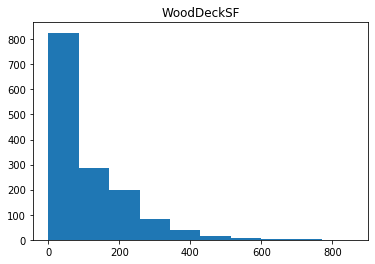

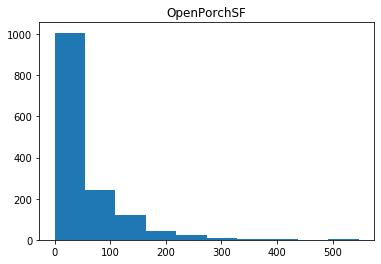

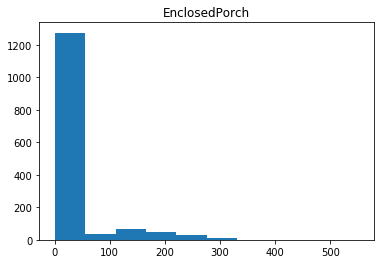

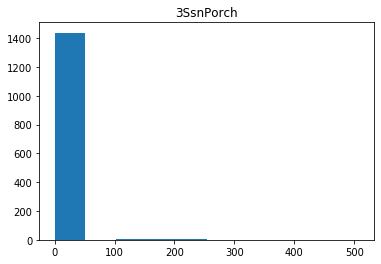

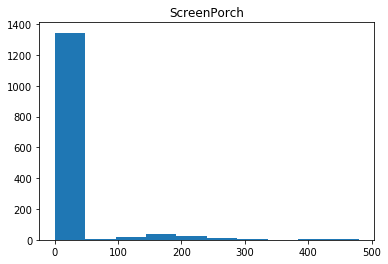

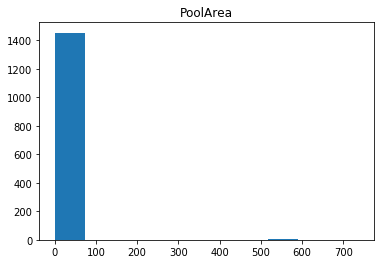

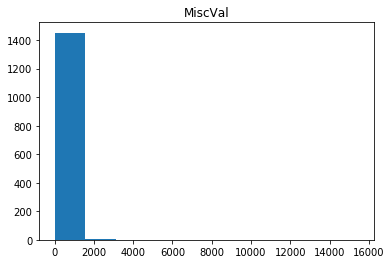

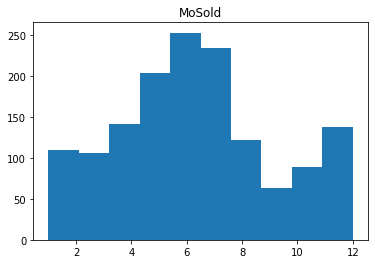

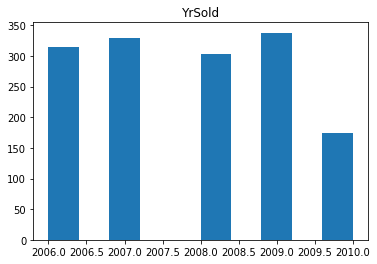

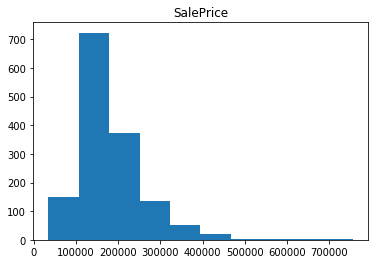

In [94]:
def num_graph(dft, num):
    
    for col in num:
        
        plt.hist(dft[col])
        plt.title(col)
        plt.show()
    
num_graph(data, num_va_na)    

In [17]:
tobath = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]


In [21]:

data1 = data.copy()

data1_test = data_test.copy()
    
for feature in tobath:
        
        data1[feature] = data1['YrSold'] - data1[feature]
        data1_test[feature] = data1_test['YrSold'] - data1_test[feature]

data1.drop(['Id', 'YrSold'], axis=1, inplace=True)
data2_test = data1_test.drop(['Id', 'YrSold'], axis=1)

In [28]:
cat_features = [feature for feature in data1.columns if data1[feature].dtypes == 'O' ]


def fill_cat_na(dft, cat_val):
    
    dfz = dft.copy()
    
    for feature in cat_val:
        
        dfz[feature].fillna(dfz[feature].mode()[0], inplace=True)
    
    return dfz


In [113]:
data2 = fill_cat_na(data1, cat_features)

data6 = fill_cat_na(data1, cat_features)


data3_test = fill_cat_na(data2_test, cat_features)

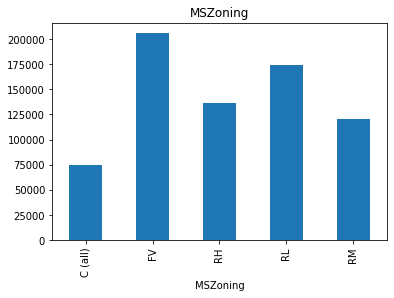

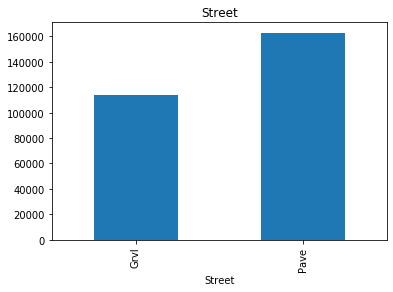

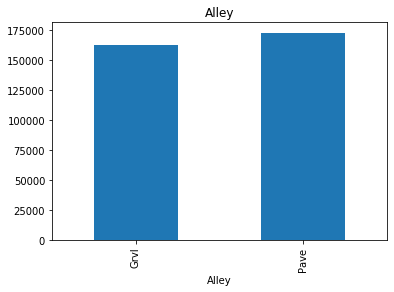

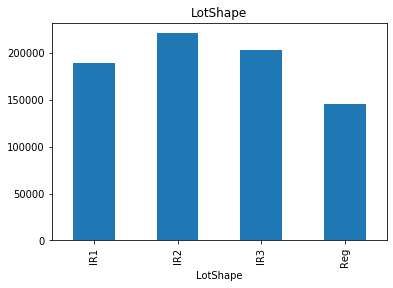

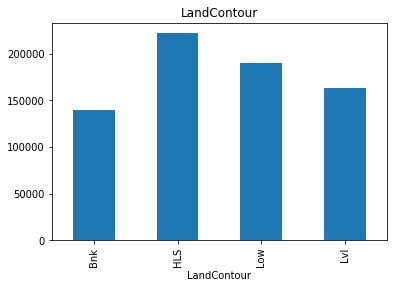

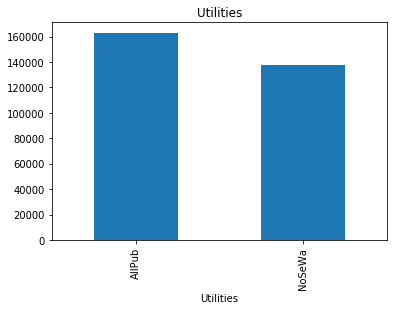

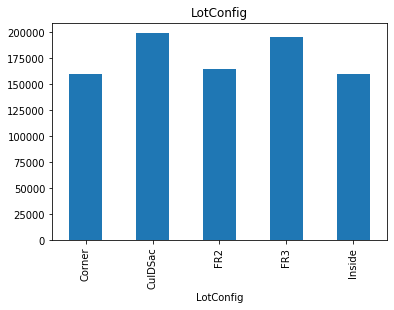

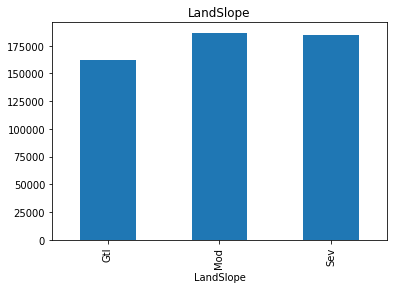

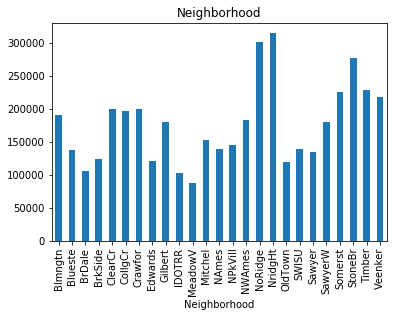

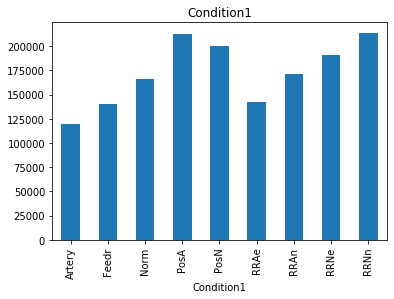

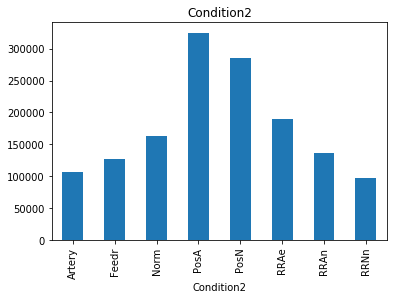

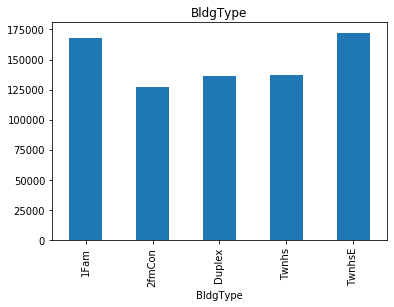

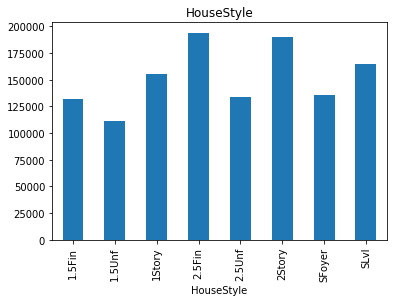

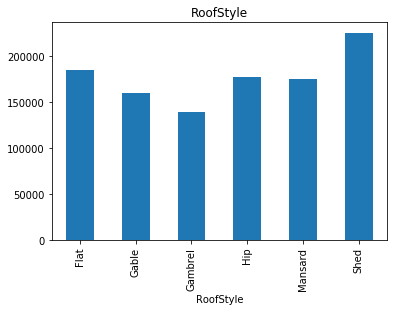

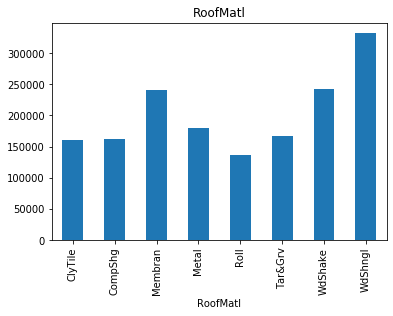

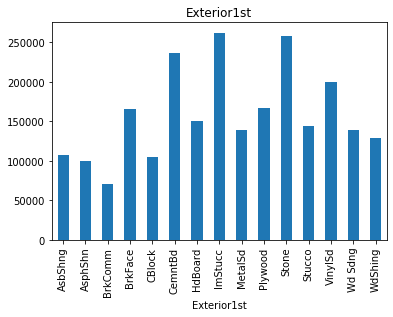

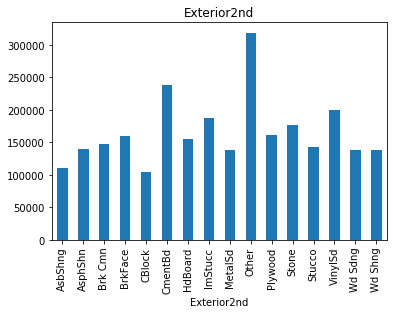

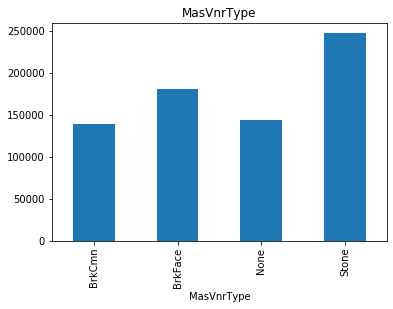

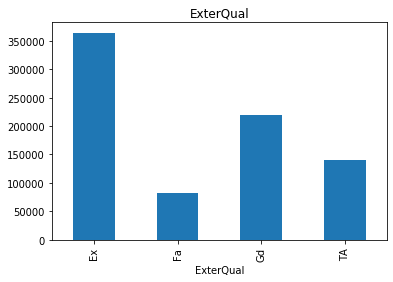

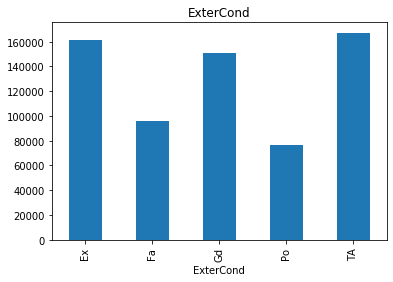

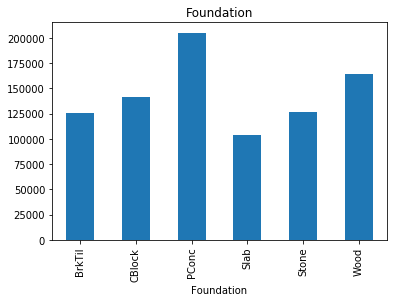

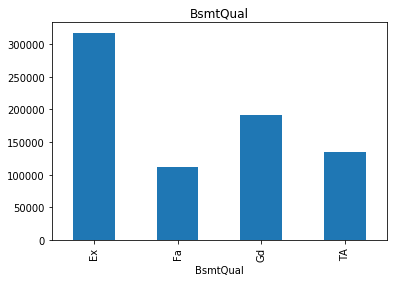

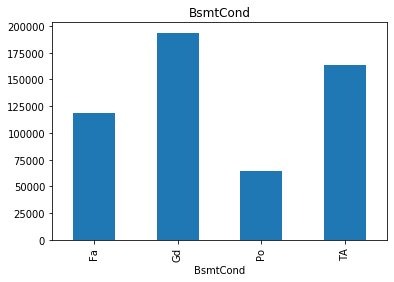

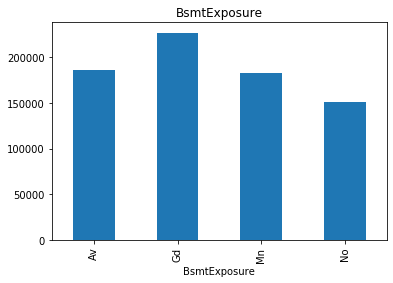

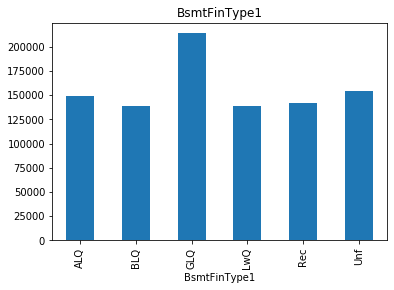

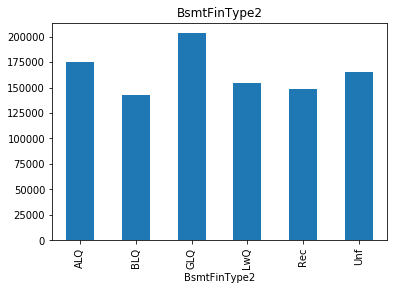

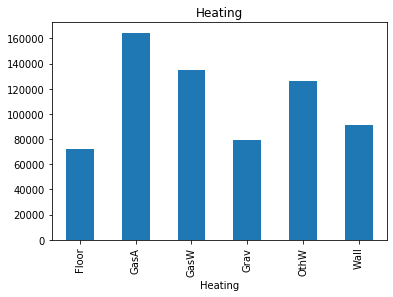

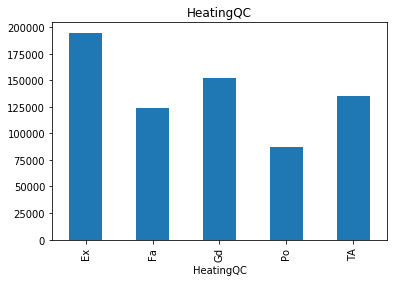

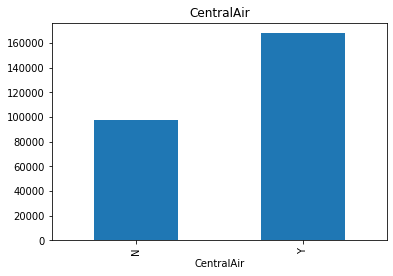

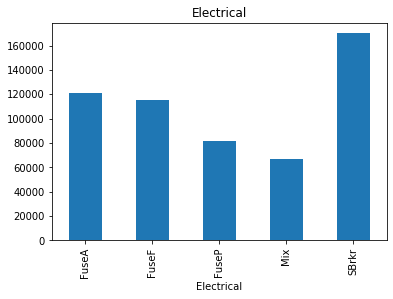

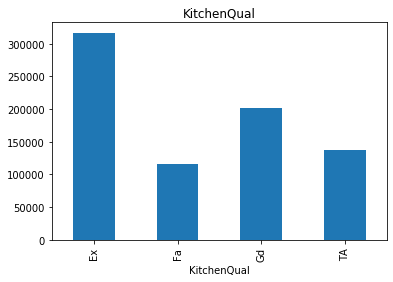

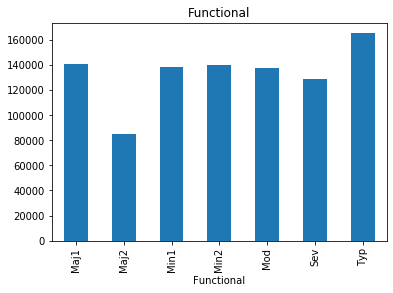

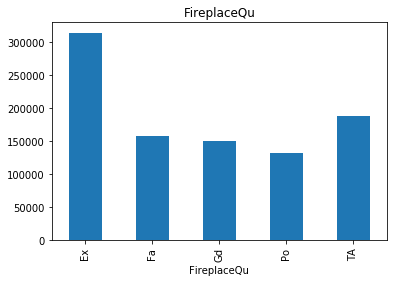

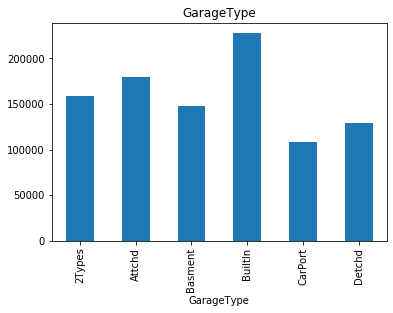

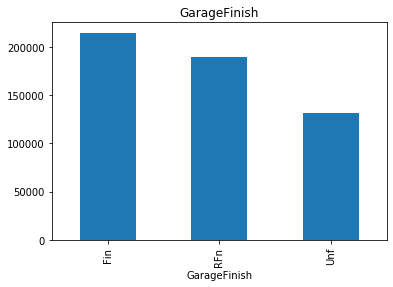

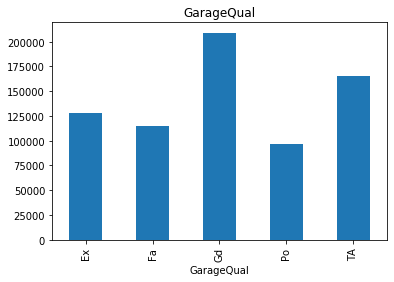

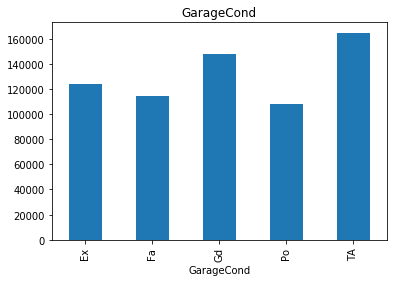

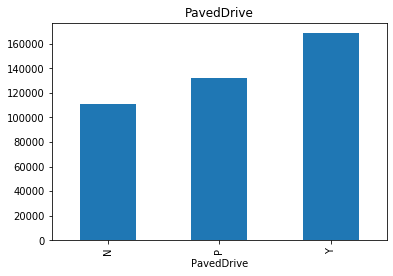

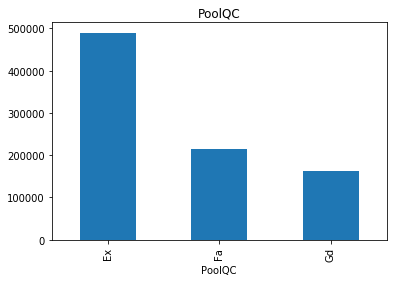

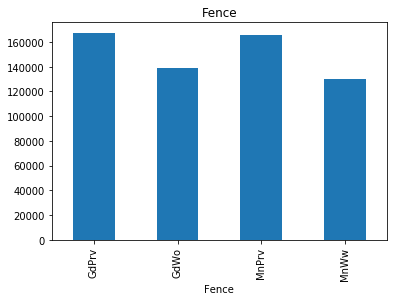

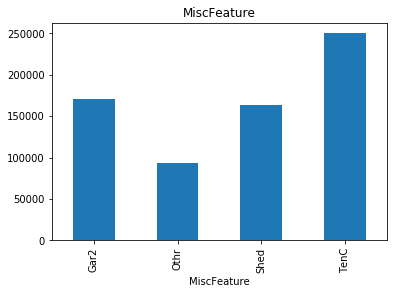

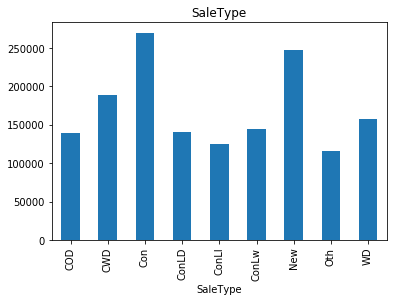

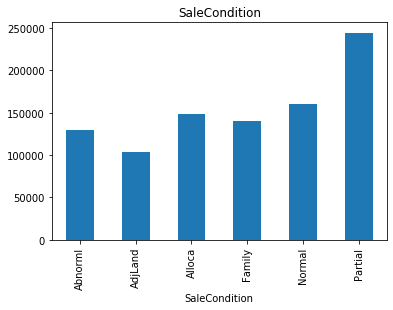

In [63]:
dt = data2[cat_features]
dt_test = data3_test[cat_features]

def cat_graph(dft, cat_va):
    
    for col in cat_va:
        
        fig, axes = plt.subplots()
        dft.groupby(col)['SalePrice'].median().plot(kind='bar')
        plt.title(col)
        plt.show()
    
    
cat_graph(data2, cat_features)

In [96]:
data3 = data2.copy() 




def check_cat_features(dft, cat_val):
    
    for col in cat_features:
        
        print(f'num of features in {col}: {len(dft[col].unique())}')

check_cat_features(data3_test, cat_features)

#getting a list of cat features with value greater than or equal to 5

val_grt = [col for col in dt if (len(dt[col].unique()) >= 5) and col not in ['Heating', 'RoofMatl', 'Electrical', 'GarageQual']]

val_grt_test = [col for col in dt_test if (len(dt_test[col].unique()) >= 5)]

num of features in MSZoning: 5
num of features in Street: 2
num of features in Alley: 2
num of features in LotShape: 4
num of features in LandContour: 4
num of features in Utilities: 1
num of features in LotConfig: 5
num of features in LandSlope: 3
num of features in Neighborhood: 25
num of features in Condition1: 9
num of features in Condition2: 5
num of features in BldgType: 5
num of features in HouseStyle: 7
num of features in RoofStyle: 6
num of features in RoofMatl: 4
num of features in Exterior1st: 13
num of features in Exterior2nd: 15
num of features in MasVnrType: 4
num of features in ExterQual: 4
num of features in ExterCond: 5
num of features in Foundation: 6
num of features in BsmtQual: 4
num of features in BsmtCond: 4
num of features in BsmtExposure: 4
num of features in BsmtFinType1: 6
num of features in BsmtFinType2: 6
num of features in Heating: 4
num of features in HeatingQC: 5
num of features in CentralAir: 2
num of features in Electrical: 4
num of features in KitchenQ

In [89]:
#label = data2['SaleType'].astype('category').cat.categories.tolist()

In [91]:
#replace_map = {k:v for k, v in  zip(label, list(range(1, len(label)+1)))}

In [100]:
#replace_map

data3_test.shape

(1459, 78)

In [115]:
data5_test = data3_test.copy()

for feature in cat_features:
    
    freq = data6.groupby(feature)['SalePrice'].mean()
        
    data5_test[feature] = data5_test[feature].map(freq)

data5_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,20,131558.375000,80.0,11622,181130.538514,181294.518675,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,145847.080000,142475.481481,181169.405536,185763.807377,175985.477961,5,6,49,49,171483.956179,179803.679219,213732.900971,214432.460317,156958.243119,0.0,144341.313466,184034.896256,149805.714511,138866.295918,181492.227745,163439.248234,146889.248120,468.0,164364.130435,144.0,270.0,882.0,182021.195378,142362.876168,186186.70989,186810.637453,896,0,0,896,0.0,0.0,1,0,2,1,139962.511565,5,183429.147059,0,171525.477570,194411.473186,49.0,137570.460641,1.0,730.0,182591.864224,183017.189055,186433.973881,140,0,0,0,120,0,490000.0,183031.880988,181007.179381,0,6,173401.836622,175202.219533
1,20,191004.994787,81.0,14267,181130.538514,181294.518675,206101.665289,180183.746758,180950.95682,181623.425856,179956.799566,145847.080000,184495.492063,181169.405536,185763.807377,175985.477961,6,6,52,52,218876.933566,179803.679219,149841.645631,148386.065990,204691.871910,108.0,144341.313466,184034.896256,149805.714511,138866.295918,181492.227745,163439.248234,161573.068182,923.0,182511.350850,0.0,406.0,1329.0,182021.195378,142362.876168,186186.70989,186810.637453,1329,0,0,1329,0.0,0.0,1,1,3,1,212116.023891,6,183429.147059,0,171525.477570,194411.473186,52.0,137570.460641,1.0,312.0,182591.864224,183017.189055,186433.973881,393,36,0,0,0,0,490000.0,183031.880988,170750.000000,12500,6,173401.836622,175202.219533
2,60,191004.994787,74.0,13830,181130.538514,181294.518675,206101.665289,180183.746758,180950.95682,176938.047529,179956.799566,192854.506329,184495.492063,181169.405536,185763.807377,210051.764045,5,5,13,12,171483.956179,179803.679219,213732.900971,214432.460317,156958.243119,0.0,144341.313466,184034.896256,225230.442040,202688.478964,181492.227745,163439.248234,235413.720096,791.0,182511.350850,0.0,137.0,928.0,182021.195378,156858.871369,186186.70989,186810.637453,928,701,0,1629,0.0,0.0,2,1,3,1,139962.511565,6,183429.147059,1,205723.488818,194411.473186,13.0,240052.690341,2.0,482.0,182591.864224,183017.189055,186433.973881,212,34,0,0,0,0,490000.0,183031.880988,181007.179381,0,3,173401.836622,175202.219533
3,60,191004.994787,78.0,9978,181130.538514,181294.518675,206101.665289,180183.746758,180950.95682,176938.047529,179956.799566,192854.506329,184495.492063,181169.405536,185763.807377,210051.764045,6,6,12,12,171483.956179,179803.679219,213732.900971,214432.460317,204691.871910,20.0,144341.313466,184034.896256,225230.442040,138866.295918,181492.227745,163439.248234,235413.720096,602.0,182511.350850,0.0,324.0,926.0,182021.195378,214914.429150,186186.70989,186810.637453,926,678,0,1604,0.0,0.0,2,1,3,1,212116.023891,7,183429.147059,1,171525.477570,194411.473186,12.0,240052.690341,2.0,470.0,182591.864224,183017.189055,186433.973881,360,36,0,0,0,0,490000.0,183031.880988,181007.179381,0,6,173401.836622,175202.219533
4,120,191004.994787,43.0,5005,181130.538514,181294.518675,206101.665289,231533.940000,180950.95682,176938.047529,179956.799566,310499.000000,184495.492063,181169.405536,181959.342105,175985.477961,8,5,18,18,171483.956179,179803.679219,163077.450450,167661.565217,156958.243119,0.0,231633.510246

In [129]:
x = data3.drop('SalePrice', axis=1)

y = data3.SalePrice

In [130]:

from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [134]:
modely = GradientBoostingRegressor(random_state=3)


modely.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
modely.score(x_test, y_test)

0.8957629673816128

In [146]:
pred = modely.predict(data5_test)

In [158]:
sub = pd.DataFrame(pred, columns = ['SalePrice'])

In [159]:
submission = pd.concat([df_test, sub], axis=1)

In [161]:
data_sub = submission[['Id', 'SalePrice']]

In [164]:
data_sub.to_csv('submit.csv', index=False)